<a href="https://colab.research.google.com/github/hakmin1015/ArtificialIntelligence/blob/main/lab3/lab3_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/AI/lab3/
!pwd

/content/drive/MyDrive/AI/lab3
/content/drive/MyDrive/AI/lab3


In [ ]:
def unpickle(file):
  import pickle
  with open(file, 'rb') as fo:
    dict = pickle.load(fo, encoding='bytes')
  return dict

In [ ]:
bat1 = unpickle('data_batch_1')
bat2 = unpickle('data_batch_2')
bat3 = unpickle('data_batch_3')
bat4 = unpickle('data_batch_4')
bat5 = unpickle('data_batch_5')
bat_test = unpickle('test_batch')

In [ ]:
data = np.concatenate([bat1[b'data'], bat2[b'data'], bat3[b'data'], bat4[b'data'], bat5[b'data']])
labels = np.concatenate([bat1[b'labels'], bat2[b'labels'], bat3[b'labels'], bat4[b'labels'], bat5[b'labels']])

In [ ]:
np.shape(data)

(50000, 3072)

In [ ]:
np.shape(labels)

(50000,)

(50000, 32, 32, 3)

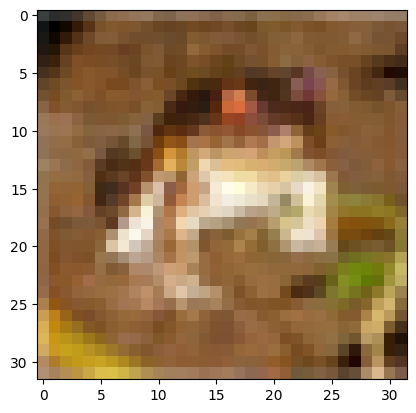

In [ ]:
import matplotlib.pyplot as plt
img = data.reshape(50000,3,32,32)
img = img.transpose(0,2,3,1)
plt.imshow(img[0].astype('uint8'))
np.shape(img)

In [ ]:
from google.colab import files
files.upload()

Saving knn.py to knn.py


{'knn.py': b'# -*- coding: utf-8 -*-\n"""knn.ipynb\n\nAutomatically generated by Colaboratory.\n\nOriginal file is located at\n    https://colab.research.google.com/drive/1Bi_yr0aFGY6g99tE__uErkm3NMtBG0Q-\n"""\n\nimport numpy as np\n\nclass NearestNeighbor:\n\n  def __init__(self):\n    pass\n\n  def train(self,X,y):\n    self.Xtr = X\n    self.ytr = y\n\n  def predict(self,X):\n    num_test = X.shape[0]\n    Ypred = np.zeros(num_test, dtype = self.ytr.dtype)\n\n    for i in range(num_test):\n      distances = np.sum(np.abs(self.Xtr - X[i,:]), axis = 1)\n      min_index = np.argmin(distances)\n      Ypred[i] = self.ytr[min_index]\n\n    return Ypred'}

In [ ]:
train_data = data
train_label = labels
test_data = bat_test[b'data']
test_label = bat_test[b'labels']
test_size = 10
type(data[0,0])

numpy.uint8

In [ ]:
from knn import NearestNeighbor

NN_classifier = NearestNeighbor()
NN_classifier.train(train_data,train_label)
test_in = test_data[0:test_size]
pred = NN_classifier.predict(test_in)

In [ ]:
num_correct = np.sum(pred == test_label[0:test_size])
accuracy = float(num_correct) / test_size
print(pred)
print(test_label[0:test_size])
print("The accuracy is (%): ", accuracy*100)

[8 8 1 0 4 2 2 5 0 8]
[3, 8, 8, 0, 6, 6, 1, 6, 3, 1]
The accuracy is (%):  20.0


In [ ]:
train_data = data.astype("float")
train_label = labels
test_data = bat_test[b'data'].astype("float")
test_label = bat_test[b'labels']
test_size = 10
type(data[0,0])

numpy.uint8

In [ ]:
from knn import NearestNeighbor

NN_classifier = NearestNeighbor()
NN_classifier.train(train_data,train_label)
test_in = test_data[0:test_size]
pred = NN_classifier.predict(test_in)

In [ ]:
num_correct = np.sum(pred == test_label[0:test_size])
accuracy = float(num_correct) / test_size
print(pred)
print(test_label[0:test_size])
print("The accuracy is (%): ", accuracy*100)

[4 8 1 0 4 6 4 2 4 8]
[3, 8, 8, 0, 6, 6, 1, 6, 3, 1]
The accuracy is (%):  30.0


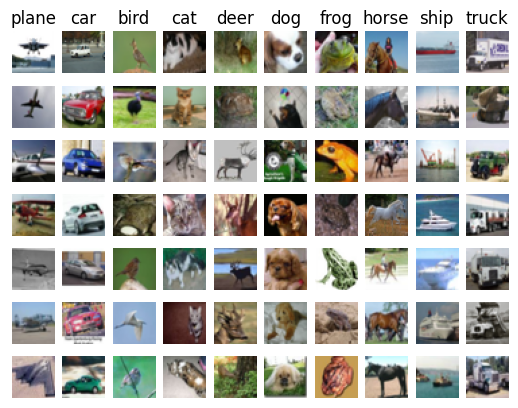

In [ ]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
  idxs = np.flatnonzero(labels == y)
  idxs = np.random.choice(idxs, samples_per_class, replace=False)
  for i, idx in enumerate(idxs):
    plt_idx = i * num_classes + y + 1
    plt.subplot(samples_per_class, num_classes, plt_idx)
    plt.imshow(img[idx].astype('uint8'))
    plt.axis('off')
    if i == 0:
      plt.title(cls)
plt.show()